# 0. Introduction
MEMS mirrors as enabling technologies are widely used in microscopes, pico projectors, and Lidar. This script will present various scanning patterns that can be implemented by MEMS mirrors. Biaxial MEMS mirrors are assumed here for simplicity. 

<div>
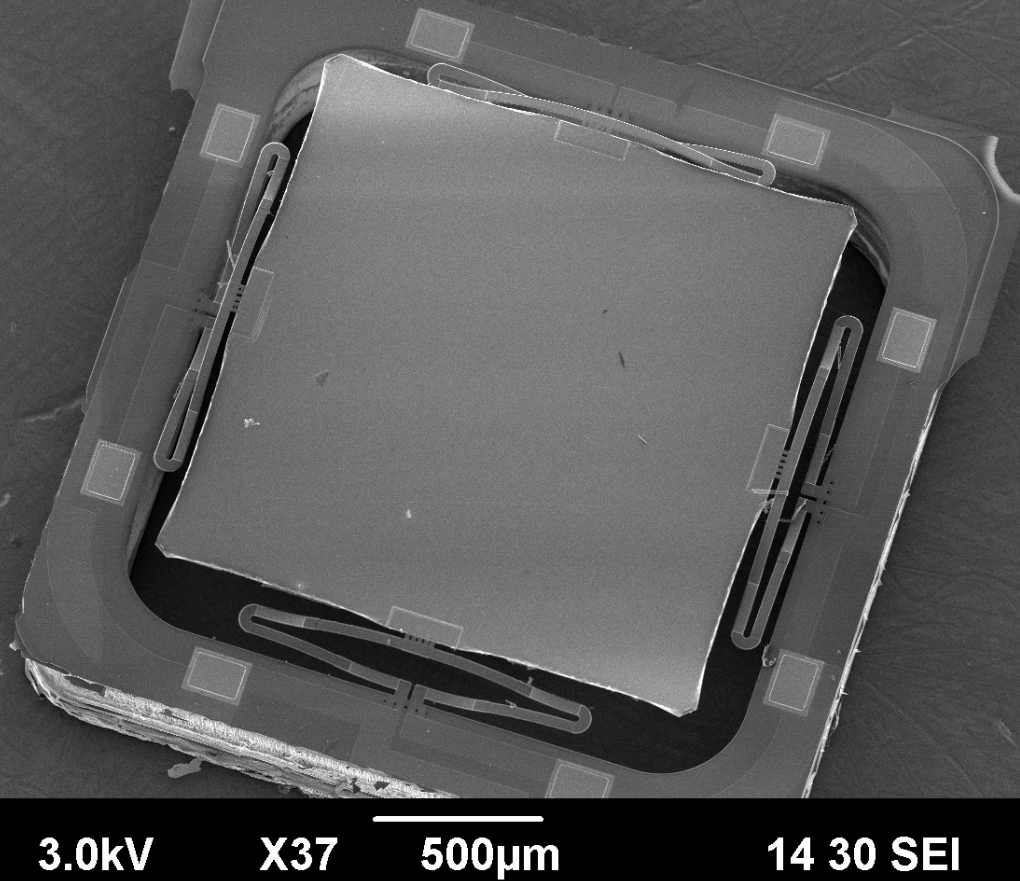
</div>

A MEMS mirror is composed of one center reflective mirror plane, one outer silicon frame, and four microactuators bridging the mirror plane and the silicon frame.

# 1. Raster Scan
Raster scan is the simplest scan pattern, which can be implemented by one axis with fast scan and the other axis with slow scan. It can further categroized into two types: sinusoidal raster scan and sawtooth raster scan.

### 1A. Sinusoidal Raster Scan

Text(0.5, 0.98, 'Raster Scan')

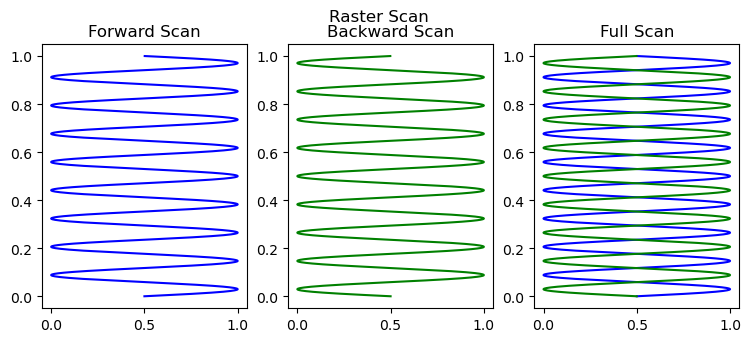

In [14]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fx= 1700    # fast axis scan frequency
fy = 100    # slow axis scan frequency
dt = np.linspace(0, 1/fy, fx*10)                      # time step
px = 0.5*(np.sin(2*np.pi*fx*dt) + 1)                   # fast axis -- sinusoidal driving
py = 0.5*(signal.sawtooth(2*np.pi*fy*dt, 0.5) +1)      # slow axis -- sawtooth driving

qt = len(dt)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 3.5), dpi=100)

axs[0].plot(px[:qt//2], py[:qt//2], 'b-')
axs[0].set_title("Forward Scan")

axs[1].plot(px[qt//2:], py[qt//2:], 'g-')
axs[1].set_title("Backward Scan")

axs[2].plot(px[:qt//2], py[:qt//2], 'b-')
axs[2].plot(px[qt//2:], py[qt//2:], 'g-')
axs[2].set_title("Full Scan")

fig.suptitle('Raster Scan')

Text(0.5, 0.98, 'Deformed Raster Scan')

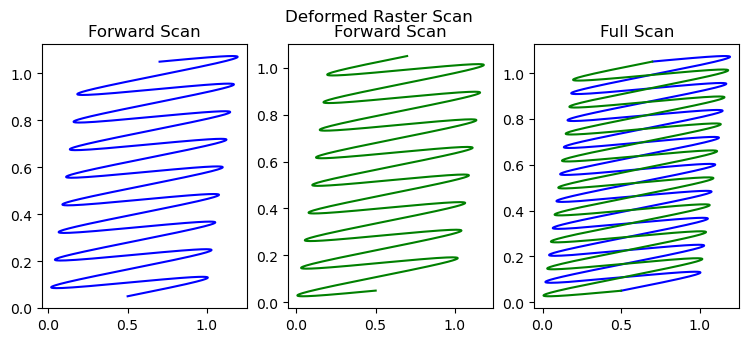

In [15]:
## Deformed raster scan pattern due to axis drifts, such as two axis coupling
py2 = py + 0.1*px
px2 = px + 0.2*py


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 3.5), dpi=100)

axs[0].plot(px2[:qt//2], py2[:qt//2], 'b-')
axs[0].set_title("Forward Scan")

axs[1].plot(px2[qt//2:], py2[qt//2:], 'g-')
axs[1].set_title("Forward Scan")

axs[2].plot(px2[:qt//2], py2[:qt//2], 'b-')
axs[2].plot(px2[qt//2:], py2[qt//2:], 'g-')
axs[2].set_title("Full Scan")

fig.suptitle('Deformed Raster Scan')

### 1B. Sawtooth Raster Scan

Text(0.5, 1.0, 'Raster scan by two sawtooth driving waveforms')

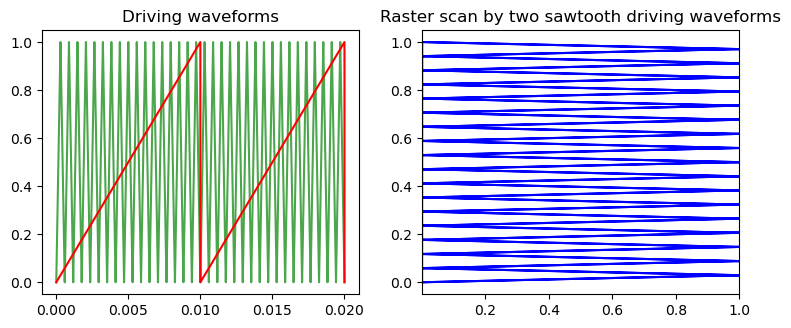

In [16]:
fx= 1700 
fy = 100
dt = np.linspace(0, 2/fy, fx*100)
px = 0.5*(signal.sawtooth(2*np.pi*fx*dt, 0.5)+1) 
py = 2*(signal.sawtooth(2*np.pi*fy*dt, 1)+1) 
qt = len(dt)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3.5), dpi=100)

axs[0].plot(dt, px, 'g-', alpha=0.7)  # fast axis waveform
axs[0].plot(dt, py/py.max(), 'r-')  # slow axis waveform
axs[0].set_title('Driving waveforms')
axs[1].plot(px/px.max(), py/py.max(), 'b-')
# axs[1].axis('off')
axs[1].set_xlim([0.001, 1])   # remove retraction path which can be controlled by laser off

axs[1].set_title('Raster scan by two sawtooth driving waveforms')

# 2. Lissajous Scan
Lissajous scan pattern is another well studied pattern, which can be driven by two sinusoidal waveforms.

Ref: Rev. Sci. Instrum. 83, 063701 (2012); https://doi.org/10.1063/1.4725525

### 2A. Regular lissajous pattern

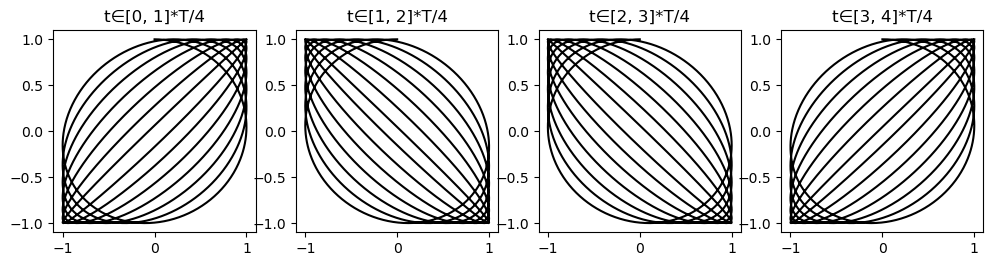

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fx0 = 29  #100 #832        # driving frequency: [Hz]
fy0 = 28  #99  #831        # driving frequency: [Hz]
f0 = np.gcd(fx0, fy0)    # Greatest common divisor (GCD) between two frequencies

# To generate the base scan pattern, only frequencies without GCD are needed
fx = int(fx0/f0)
fy = int(fy0/f0)

# phase difference
alpha = 0.5
phi = alpha/2/fx

# the frame peroid to generate a full lissajous pattern
T = 1/np.abs(fx-fy)


fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), dpi=100)
for i in np.arange(4):
    t = np.linspace(i*T/4, (i+1)*T/4, 5000)       # time step of a quarter peroid

    # driving waveforms
    cpx = np.cos(2*np.pi*fx*t)
    cpy = np.cos(2*np.pi*fy*t - phi)
    
    # plot a quarter peroid
    axs[i].plot(cpx, cpy, 'k')
    axs[i].set_aspect('equal', adjustable='box')
    axs[i].set_title(f't∈[{i}, {i+1}]*T/4')

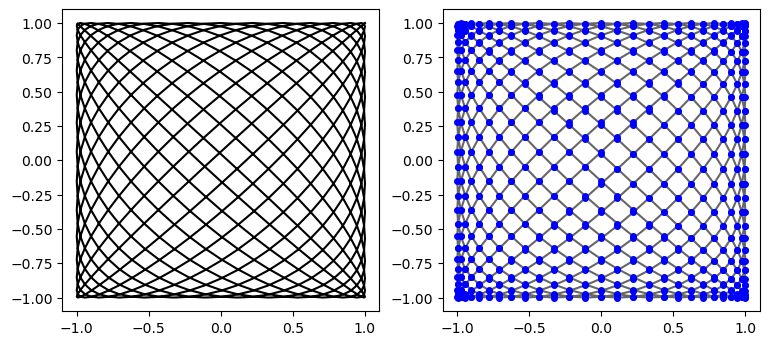

In [5]:
# ctc = np.arange(2*fx*fy)/(2*fx*fy)  
# ctc = ctc[(T/4<ctc) * (ctc<=T/2)]

dt = f0/(2*fx*fy)             # time at lissajous cross point
ctc = np.arange(0, T/2, dt)   # timestamps at cross points

# lissajous curve cross points
cpxd = np.cos(2*np.pi*fx*ctc)
cpyd = np.cos(2*np.pi*fy*ctc - phi)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), dpi=100)
axs[0].plot(cpxd, cpyd, 'k-', ms = 0.5)               # full lissajous pattern
axs[1].plot(cpxd, cpyd, 'k-', ms = 0.5, alpha=0.6)    
axs[1].plot(cpxd, cpyd, 'bo', ms = 4)                 # cross points

### 2B. Deformed Lissajous Pattern
Deformed lissajous patterns are generated due to the driving single at one axis leaking into the other aixs. In other words, the two driving axes couple together.

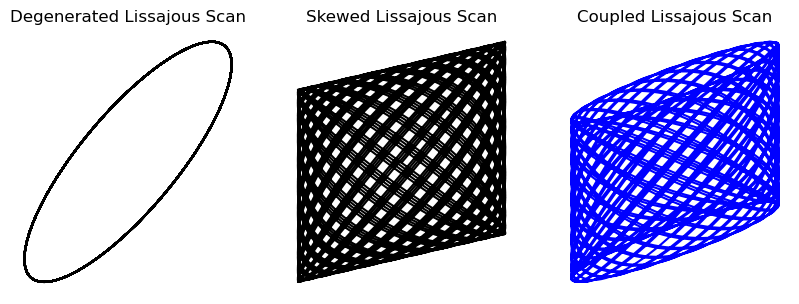

In [18]:
# a resonant MEMS mirror with two slightly different frequencies

fx = 119.3     # resonant frequency at x-axis
df = 5      
fy = fx + df   # resonant frequency at y-axis, which is slightly different from that of y-axis
T = 1/df if df else 1/fx    # frame time
t = np.linspace(0, 2*T, 5000, endpoint=True)

fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=True, figsize=(10, 3.5), dpi=100)
# fig.suptitle('Deformed Lissajous Patterns')

## Degenerated lissajous
px = np.sin(2*np.pi*fx*t)                     # driving signal at frequency fx
py = 0.1 * np.sin(2*np.pi*fx*t  - np.pi/5)    # driving signal on x-axis is leaking into y-axis

ax[0].plot(px, py, 'k-')
ax[0].set_title('Degenerated Lissajous Scan')
ax[0].axis('off')

## Skewed lissajous
px = np.sin(2*np.pi*fx*t) #+ 0.25*np.sin(2*np.pi*fy*t)
py = np.sin(2*np.pi*fy*t - phi) + 0.25*np.sin(2*np.pi*fx*t)
ax[1].plot(px, py, 'k-')
ax[1].set_title('Skewed Lissajous Scan')
ax[1].axis('off')

## Coupled lissajous, which is usually caused by two axis coupling
# px = np.cos(2*np.pi*fx*t) + 0.2*np.cos(2*np.pi*fy*t - phi)
px = np.sin(2*np.pi*fx*t)
py = np.sin(2*np.pi*fy*t - np.pi/4) + 0.5*np.sin(2*np.pi*fx*t - np.pi/8)
ax[2].plot(px, py, 'b-')
ax[2].set_title('Coupled Lissajous Scan')
ax[2].axis('off')

_ = [ax.grid() for ax in axs]

One specific feature: lissajous curves drift across frames as shown in the above patterns. It can be also vividly presented by the following quarter patterns.

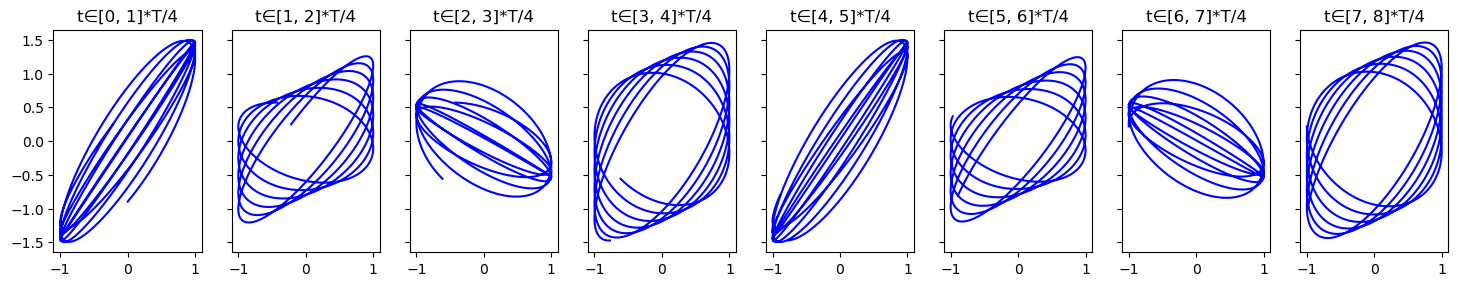

In [19]:
# plot quarter lissajous curves
fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(18, 3), dpi=100, sharex=True, sharey=True)
for i in np.arange(8):
    t = np.linspace(i*T/4, (i+1)*T/4, 5000)       # time step of a quarter peroid

    # driving waveforms
    px = np.sin(2*np.pi*fx*t)
    py = np.sin(2*np.pi*fy*t - np.pi/4) + 0.5*np.sin(2*np.pi*fx*t - np.pi/8)
    
    # plot a quarter peroid
    axs[i].plot(px, py, 'b')
    axs[i].set_aspect('equal', adjustable='box')
    axs[i].set_title(f't∈[{i}, {i+1}]*T/4')

To form a stable lissajous scan pattern, new driving frequencies can be chosen based on the following patterns: 

fx ≈ p*f0

fy ≈ q*f0

where p and q are prime numbers mutally.

Thus, the ratio fx/fy = p/q is fixed. Typically, p and q can be set as 2*n-1 and 2*n, respectively. The driving signals with fixed frequency ratio will enable a fixed lissajous patterns across peroids.

Note: The chosen driving frequencies will be slightly different from their corresponding resonant frequencies.

In [8]:
from scipy.optimize import leastsq, minimize

def func(x, fx, fy, n):
    """
    decompose fx, fy into the following factors to set new driving frequencies near resonances, 
    fx = (2*n-1)*f0
    fy = 2*n*f0
    """
    f0 = x
    return (fx - (2*n-1)*f0)**2 + (fy - (2*n)*f0)**2   # cost function for minimization

bnds = ((0, None))
results = []
cost = np.inf

# Solve the equation for each interger n
for n in range(30):
    res = minimize(func, x0=[11], method='SLSQP', args=(fx, fy, n),)
    f0 = res.x[0]
    fx_prime = (2*n-1)*f0
    fy_prime = 2*n*f0
    cost_new = np.abs(fx_prime-fx)+np.abs(fy_prime-fy)
    
    # update integer n & f0
    if cost > cost_new:
        cost = cost_new
        results = [n, f0]
        
# new driving frequencies
n = int(results[0])
f0 = round(results[1], 3)   # Round the base frequency to 3 decimal points to mimic a real driving frequency with a finite resolution 
fx_new = (2*n-1)*f0
fy_new = (2*n)*f0

print(f"Scanner resonant frequencies: {fx} Hz, {fy} Hz")
print(f"Driving frequencies: {fx_new} Hz, {fy_new} Hz")
print(f"Driving frequency ratio: {2*n-1}/{2*n} with a base frequency: {f0} Hz")
# n, fx_new, fy_new, fx, fy, results

Scanner resonant frequencies: 119.3 Hz, 124.3 Hz
Driving frequencies: 119.209 Hz, 124.392 Hz
Driving frequency ratio: 23/24 with a base frequency: 5.183 Hz


[2.17631748]


Text(0.5, 1.0, 'Raster scan pattern @ fx/fy = 23/24')

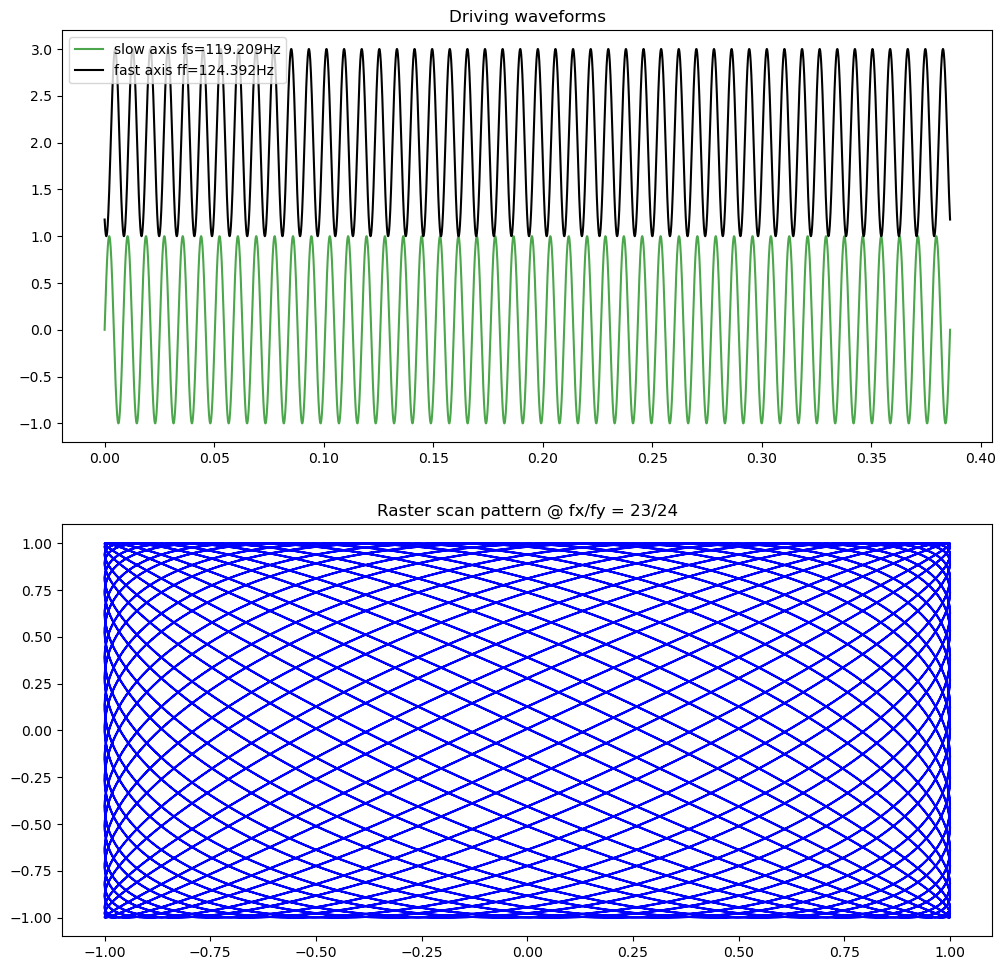

In [9]:
T = 1/np.abs(fx_new - fy_new)  # 1/f0
t = np.linspace(0, 2*T, 5000, endpoint=True)   # 2*T is used here specifically to show the scan patterns don't drift across frames

rng = np.random.default_rng(15)
phi = rng.random(1) * np.pi
print(phi)
px = np.sin(2*np.pi*fx_new*t)
py = np.sin(2*np.pi*fy_new*t - phi)  # different phase will generate different pattern 

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), dpi=100)

axs[0].plot(t, px, 'g-', alpha=0.7, label=f"slow axis fs={fx_new}Hz")    # slow axis waveform
axs[0].plot(t, py/py.max()+2, 'k-', label=f"fast axis ff={fy_new}Hz")    # fast axis waveform, a deviation is added for displaying
axs[0].set_title('Driving waveforms')
axs[0].legend()
axs[1].plot(px/px.max(), py/py.max(), 'b-')

axs[1].set_title(f'Raster scan pattern @ fx/fy = {2*n-1:d}/{2*n:d}')

# 3. Elliptical Scan

Time peroid: 0.04 s


Text(0.5, 1.0, 'Elliptical Scan')

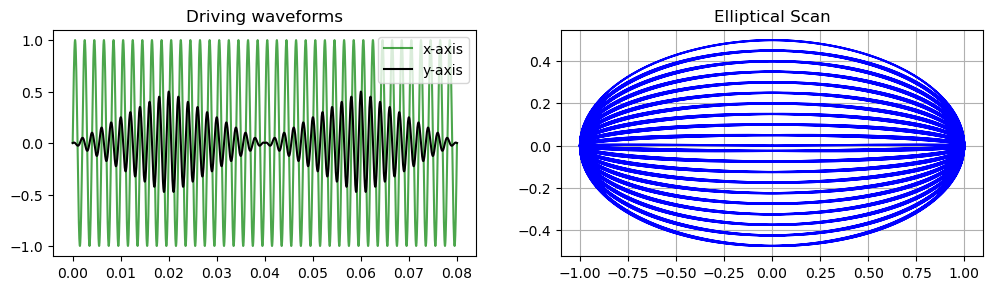

In [10]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fx= 500          # 5000 Hz
fps = 25         # frame per second
T = 1/fps
f_amp =  fps         # 0.5*fps
print(f'Time peroid: {T} s')

t = np.linspace(0, 2*T, fx*10)
amp = 0.25*(signal.sawtooth(2*np.pi*f_amp*t, 0.5) + 1)
x = np.sin(2*np.pi*fx*t)
y = amp * np.cos(2*np.pi*fx*t)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), dpi=100)

axs[0].plot(t, x, 'g-', alpha=0.7, label="x-axis")  # fast axis waveform
axs[0].plot(t, y, 'k-', label="y-axis")    # slow axis waveform
axs[0].set_title('Driving waveforms')
axs[0].legend()
axs[1].plot(x, y, 'b-')
axs[1].grid()

axs[1].set_title('Elliptical Scan')

# 4. Rose Scan

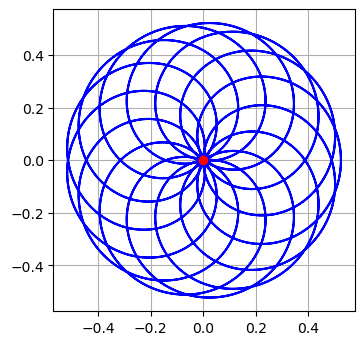

In [11]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ff = 30        # fast scan frequency
fs = 4         # slow scan frequency
dt = np.linspace(0, 1, int(1e5))

n = 1.5
amp = (n-1) * 30 / 180 * np.pi
phi = np.pi/3

rx = amp * (1 + np.cos(2 * np.pi * (fs - ff) * dt))
ry = amp * np.sin(2 * np.pi * (fs - ff) * dt)
x = np.cos(2 * np.pi * ff * dt) * rx - np.sin(2 * np.pi * ff * dt) * ry
y = np.sin(2 * np.pi * ff * dt) * rx + np.cos(2 * np.pi * ff * dt) * ry

plt.figure(dpi=100)
plt.plot(x, y, 'b-', np.mean(x), np.mean(y), 'ro')
plt.grid(True)
_ = plt.axis('scaled')
# plt.axis('off')

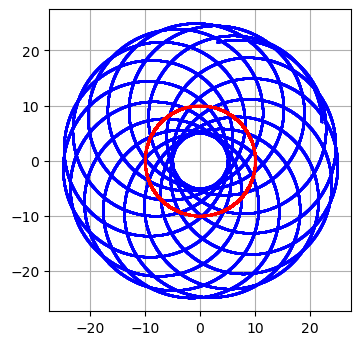

In [12]:
# An omnidirectional scan can cover 360° peripheral region, which can be realized by inject two different frequecies into the same axis.

from scipy import signal
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

fx = 2281       # resonant scan frequency
fy = 140        # centroid scan frequency

dt = np.arange(0, 1/min(fx, fy), 1/23*1e-6)  # timestamp

theta_x = 15    # vibration amplitude
theta_y = 10    # centroid amplitude
phi = np.deg2rad(45)

# centroid scan
cx = theta_y * np.cos(2*np.pi*fy*dt + phi)
cy = theta_y * np.sin(2*np.pi*fy*dt + phi)

# centroid scan + resonate scan
x = theta_x * np.cos(2*np.pi*fx*dt) + cx
y = theta_x * np.sin(2*np.pi*fx*dt) + cy

plt.figure(dpi=100)
plt.plot(x, y, 'b.', ms=1)
plt.plot(cx, cy, 'r.-', ms=2)
plt.axis('square')
plt.grid()